## NLP Class Assignment 5

In [1]:
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

#### Read news data

In [2]:
news_path = 'https://storage.googleapis.com/msca-bdp-data-open/news/nlp_a_5_news.json'
news_df = pd.read_json(news_path, orient='records', lines=True)

print(f'Sample contains {news_df.shape[0]:,.0f} news articles')
news_df.head(2)

Sample contains 10,012 news articles


,url,date,language,title,text
0,http://kokomoperspective.com/obituaries/jon-w-horton/article_b6ba8e1e-cb9c-11eb-9868-fb11b88b9778.html,2021-06-13,en,Jon W. Horton | Obituaries | kokomoperspective.com,Jon W. Horton | Obituaries | kokomoperspective.comYou have permission to edit this article. EditCloseSign Up Log In Dashboard LogoutMy Account Dashboard Profile Saved items LogoutCOVID-19Click here for the latest local news on COVID-19HomeAbout UsContact UsNewsLocalOpinionPoliticsNationalStateAgricultureLifestylesEngagements/Anniversaries/WeddingsAutosEntertainmentHealthHomesOutdoorsSportsNFLNCAAVitalsObituariesAutomotivee-EditionCouponsGalleries74°...
1,https://auto.economictimes.indiatimes.com/news/auto-components/birla-precision-to-ramp-up-capacity-to-tap-emerging-opportunities-in-india/81254902,2021-02-28,en,"Birla Precision to ramp up capacity to tap emerging opportunities in India, Auto News, ET Auto","Birla Precision to ramp up capacity to tap emerging opportunities in India, Auto News, ET Auto We have updated our terms and conditions and privacy policy Click ""Continue"" to accept and continue with ET AutoAccept the updated privacy & cookie policyDear user, ET Auto privacy and cookie policy has been updated to align with the new data regulations in European Union. Please review and accept these changes below to continue using the website.You can see our privacy policy & our cookie ..."


#### Read Tweets data

In [3]:
tweets_path = 'https://storage.googleapis.com/msca-bdp-data-open/tweets/nlp_a_5_tweets.json'
tweets_df = pd.read_json(tweets_path, orient='records', lines=True)
print(f'Sample contains {tweets_df.shape[0]:,.0f} tweets')
tweets_df.head(2)

Sample contains 10,105 tweets


,id,lang,date,name,retweeted,text
0,1534565117614084096,en,2022-06-08,Low Orbit Tourist 🌍📷,,"Body &amp; Assembly - Halewood - United Kingdom\n🌍53.3504,-2.8352296,402m\n\nHalewood Body &amp; Assembly is a Jaguar Land Rover factory in Halewood, England, and forms the major part of the Halewood complex which is shared with Ford who manufacture transmissions at the site. [Wikipedia] https://t.co/LPmCnZIaVt"
1,1534565743429394439,en,2022-06-08,CompleteCar.ie,RT,"Land Rover Ireland has announced that the new Range Rover Sport starts at €114,150, now on @completecar:\n\nhttps://t.co/TjGUkL3FYr https://t.co/QdVaEiJkjO"


##### Discard non-English results

In [4]:
# removing non-english results from news
news_df = news_df[news_df['language'] == 'en']

# removing non-englihs results from tweets
tweets_df = tweets_df[tweets_df['lang'] == 'en']

##### Text Cleaning

In [5]:
import re
import nltk
from nltk.corpus import words
from nltk.tokenize import word_tokenize

nltk.download("words")

[nltk_data] Downloading package words to /Users/xnxk040/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [6]:
# cleaning text
def cleaning_text(text):
    # Missing values
    if not isinstance(text, str):
        return ""

    # Remove usernames
    text = re.sub(r'@\w+', '', text)

    # Remove URLs
    text = re.sub(r"(http\S+|www\S+|\S+\.\S+)", "", text)

    # Remove hashtags (keep only the word)
    text = re.sub(r'#(\w+)', r'\1', text)

    # Remove special characters & numbers **EXCEPT periods**
    text = re.sub(r"[^a-zA-Z.\s]", "", text)  # Keep letters, spaces, and periods

    # Ensure spaces are preserved
    text = re.sub(r"\s+", " ", text).strip()

    return text

In [7]:
# apply clean functions
tweets_df['cleaned_text'] = tweets_df['text'].apply(cleaning_text)
tweets_df.head(5)

,id,lang,date,name,retweeted,text,cleaned_text
0,1534565117614084096,en,2022-06-08,Low Orbit Tourist 🌍📷,,"Body &amp; Assembly - Halewood - United Kingdom\n🌍53.3504,-2.8352296,402m\n\nHalewood Body &amp; Assembly is a Jaguar Land Rover factory in Halewood, England, and forms the major part of the Halewood complex which is shared with Ford who manufacture transmissions at the site. [Wikipedia] https://t.co/LPmCnZIaVt",Body amp Assembly Halewood United Kingdom Halewood Body amp Assembly is a Jaguar Land Rover factory in Halewood England and forms the major part of the Halewood complex which is shared with Ford who manufacture transmissions at the site. Wikipedia
1,1534565743429394439,en,2022-06-08,CompleteCar.ie,RT,"Land Rover Ireland has announced that the new Range Rover Sport starts at €114,150, now on @completecar:\n\nhttps://t.co/TjGUkL3FYr https://t.co/QdVaEiJkjO",Land Rover Ireland has announced that the new Range Rover Sport starts at now on
2,1529341557580652545,en,2022-05-25,Exmoor Trim,,New Land Rover Range Rover Hits Top Speed With Ease On Autobahn\n\nhttps://t.co/19QOgAIu3v,New Land Rover Range Rover Hits Top Speed With Ease On Autobahn
3,1542790343535755264,en,2022-07-01,Land Rover UK,,"@BeckyWatts1 Hi, thank you for your post. I am sorry to learn of your retailer experience, however when order slots are available they will be presented to the retailer, and it is at their discretion which vehicles they submit. Please continue to liaise with them. Thanks, Dan - Land Rover UK",Hi thank you for your post. I am sorry to learn of your retailer experience however when order slots are available they will be presented to the retailer and it is at their discretion which vehicles they submit. Please continue to liaise with them. Thanks Dan Land Rover UK
4,1516732103370493954,en,2022-04-20,Sussexes❤️👑🐼🌸,,@cofvefe917 @Mackingday No this was during the Land Rover driving challenge.,No this was during the Land Rover driving challenge.


In [8]:
# apply clean functions
news_df['cleaned_titles'] = news_df['title'].apply(cleaning_text)
news_df['cleaned_text'] = news_df['text'].apply(cleaning_text)
news_df.head(5)

,url,date,language,title,text,cleaned_titles,cleaned_text
0,http://kokomoperspective.com/obituaries/jon-w-horton/article_b6ba8e1e-cb9c-11eb-9868-fb11b88b9778.html,2021-06-13,en,Jon W. Horton | Obituaries | kokomoperspective.com,Jon W. Horton | Obituaries | kokomoperspective.comYou have permission to edit this article. EditCloseSign Up Log In Dashboard LogoutMy Account Dashboard Profile Saved items LogoutCOVID-19Click here for the latest local news on COVID-19HomeAbout UsContact UsNewsLocalOpinionPoliticsNationalStateAgricultureLifestylesEngagements/Anniversaries/WeddingsAutosEntertainmentHealthHomesOutdoorsSportsNFLNCAAVitalsObituariesAutomotivee-EditionCouponsGalleries74°...,Jon W. Horton Obituaries,Jon W. Horton Obituaries have permission to edit this article. EditCloseSign Up Log In Dashboard LogoutMy Account Dashboard Profile Saved items LogoutCOVIDClick here for the latest local news on COVIDHomeAbout UsContact UsNewsLocalOpinionPoliticsNationalStateAgricultureLifestylesEngagementsAnniversariesWeddingsAutosEntertainmentHealthHomesOutdoorsSportsNFLNCAAVitalsObituariesAutomotiveeEditionCouponsGalleriesFair Kokomo IN TodayA few clouds. A stray shower or thunderstorm is possible. Low F....
1,https://auto.economictimes.indiatimes.com/news/auto-components/birla-precision-to-ramp-up-capacity-to-tap-emerging-opportunities-in-india/81254902,2021-02-28,en,"Birla Precision to ramp up capacity to tap emerging opportunities in India, Auto News, ET Auto","Birla Precision to ramp up capacity to tap emerging opportunities in India, Auto News, ET Auto We have updated our terms and conditions and privacy policy Click ""Continue"" to accept and continue with ET AutoAccept the updated privacy & cookie policyDear user, ET Auto privacy and cookie policy has been updated to align with the new data regulations in European Union. Please review and accept these changes below to continue using the website.You can see our privacy policy & our cookie ...",Birla Precision to ramp up capacity to tap emerging opportunities in India Auto News ET Auto,Birla Precision to ramp up capacity to tap emerging opportunities in India Auto News ET Auto We have updated our terms and conditions and privacy policy Click Continue to accept and continue with ET AutoAccept the updated privacy cookie policyDear user ET Auto privacy and cookie policy has been updated to align with the new data regulations in European Union. Please review and accept these changes below to continue using the can see our privacy policy our cookie policy. We use cookies to ens...
2,https://ca.sports.yahoo.com/news/global-hydrogen-fueling-station-markets-104800330.html?src=rss,2021-12-07,en,Global Hydrogen Fueling Station Markets to 2035: Current State and Future Prognosis of Passenger Hydrogen Fuel Cell Vehicles (FCVs),Global Hydrogen Fueling Station Markets to 2035: Current State and Future Prognosis of Passenger Hydrogen Fuel Cell Vehicles (FCVs) HOME MAIL NEWS SPORTS FINANCE CELEBRITY STYLE MOVIES WEATHER MOBILE Yahoo Sports Sign in Mail Sign in to view your mail Sports Home Sports Home Fantasy Fantasy Fantasy FootballFantasy Football Fantasy HockeyFantasy Hockey Fantasy BasketballFantasy Basketball Fantasy Auto RacingFantasy Auto Racing Fantasy Go...,Global Hydrogen Fueling Station Markets to Current State and Future Prognosis of Passenger Hydrogen Fuel Cell Vehicles FCVs,Global Hydrogen Fueling Station Markets to Current State and Future Prognosis of Passenger Hydrogen Fuel Cell Vehicles FCVs HOME MAIL NEWS SPORTS FINANCE CELEBRITY STYLE MOVIES WEATHER MOBILE Yahoo Sports Sign in Mail Sign in to view your mail Sports Home Sports Home Fantasy Fantasy Fantasy FootballFantasy Football Fantasy HockeyFantasy Hockey Fantasy BasketballFantasy Basketball Fantasy Auto RacingFantasy Auto Racing Fantasy GolfFantasy Golf Fantasy BaseballFantasy Baseball NHL NHL NHL Home...
3,https://cardealermagazine.co.uk/publish/july-20-backlash-over-covid-passports-cummings-leaks-more-pm-texts-extreme-heat-warning

##### Use both NLTK & SpaCy NER packages with and without sentence segmentation to extract named entities
Evaluate which of the four models provide the best results
- Top-20 list should only be based on your most accurate results from the best NER package

In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag, ne_chunk
from nltk.tree import Tree

nltk.download("punkt")
nltk.download("maxent_ne_chunker")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /Users/xnxk040/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/xnxk040/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/xnxk040/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
import multiprocessing as mp

num_processors = mp.cpu_count()  # Get total number of CPU cores
print(f"Total CPU Cores: {num_processors}")

Total CPU Cores: 8


In [11]:
workers = num_processors - 1  # Leave 1 core unused for overhead
print(f"Using {workers} workers")

Using 7 workers


In [12]:
from pandarallel import pandarallel
pandarallel.initialize(nb_workers = workers, progress_bar=True)

INFO: Pandarallel will run on 7 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [13]:
# extract entities from text using NLTK (without sentence segmentation default)
def extract_nltk_entities(text, use_sentence_segmentation=False):
    named_entities = []

    if not isinstance(text, str) or text.strip() == "":
        return []  # Return empty list for missing/empty values
    
    # Sentence segmentation if enabled
    sentences = sent_tokenize(text) if use_sentence_segmentation else [text]

    for sent in sentences:
        words = word_tokenize(sent)
        pos_tags = pos_tag(words)
        chunked_tree = ne_chunk(pos_tags)

        for subtree in chunked_tree:
            if isinstance(subtree, Tree):
                entity_name = " ".join(word for word, tag in subtree.leaves())
                entity_type = subtree.label()

                if entity_type in ["ORG", "GPE"]:  # Companies & Locations
                    named_entities.append((entity_name, entity_type))
    
    return named_entities

In [14]:
# Apply NLTK NER to tweets without segmentation
tweets_df["nltk_entities"] = tweets_df["cleaned_text"].parallel_apply(extract_nltk_entities)

In [15]:
# Apply NLTK NER with sentence segmentation
tweets_df["nltk_entities_with_seg"] = tweets_df["cleaned_text"].parallel_apply(
    lambda x: extract_nltk_entities(x, use_sentence_segmentation=True)
)

In [16]:
tweets_df.head(3)

,id,lang,date,name,retweeted,text,cleaned_text,nltk_entities,nltk_entities_with_seg
0,1534565117614084096,en,2022-06-08,Low Orbit Tourist 🌍📷,,"Body &amp; Assembly - Halewood - United Kingdom\n🌍53.3504,-2.8352296,402m\n\nHalewood Body &amp; Assembly is a Jaguar Land Rover factory in Halewood, England, and forms the major part of the Halewood complex which is shared with Ford who manufacture transmissions at the site. [Wikipedia] https://t.co/LPmCnZIaVt",Body amp Assembly Halewood United Kingdom Halewood Body amp Assembly is a Jaguar Land Rover factory in Halewood England and forms the major part of the Halewood complex which is shared with Ford who manufacture transmissions at the site. Wikipedia,"[(Body, GPE), (Halewood England, GPE)]","[(Body, GPE), (Halewood England, GPE), (Wikipedia, GPE)]"
1,1534565743429394439,en,2022-06-08,CompleteCar.ie,RT,"Land Rover Ireland has announced that the new Range Rover Sport starts at €114,150, now on @completecar:\n\nhttps://t.co/TjGUkL3FYr https://t.co/QdVaEiJkjO",Land Rover Ireland has announced that the new Range Rover Sport starts at now on,"[(Land, GPE)]","[(Land, GPE)]"
2,1529341557580652545,en,2022-05-25,Exmoor Trim,,New Land Rover Range Rover Hits Top Speed With Ease On Autobahn\n\nhttps://t.co/19QOgAIu3v,New Land Rover Range Rover Hits Top Speed With Ease On Autobahn,"[(New Land, GPE)]","[(New Land, GPE)]"


In [17]:
# check for ORG in nltk_entities_text or nltk_entities_text_with_seg
tweets_w_org = tweets_df["nltk_entities_with_seg"].apply(
    lambda entities: any(label == "ORG" for _, label in entities)
)

# Print only rows where tweets_w_org is True
tweets_with_org_df = tweets_df[tweets_w_org]

# Display the filtered DataFrame
print(tweets_with_org_df.head())

Empty DataFrame
Columns: [id, lang, date, name, retweeted, text, cleaned_text, nltk_entities, nltk_entities_with_seg]
Index: []


In [18]:
# Apply NLTK NER to news (without segmentation)
news_df["nltk_entities_title"] = news_df["cleaned_titles"].parallel_apply(extract_nltk_entities)
news_df["nltk_entities_text"] = news_df["cleaned_text"].parallel_apply(extract_nltk_entities)

In [19]:
# Apply NLTK NER with sentence segmentation
news_df["nltk_entities_title_with_seg"] = news_df["cleaned_titles"].parallel_apply(
    lambda x: extract_nltk_entities(x, use_sentence_segmentation=True)
)
news_df["nltk_entities_text_with_seg"] = news_df["cleaned_text"].parallel_apply(
    lambda x: extract_nltk_entities(x, use_sentence_segmentation=True)
)

python(24332) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


python(24333) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(24334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(24335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(24336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(24337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(24338) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(24339) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


python(28654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(28665) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [20]:
news_df.head(3)

,url,date,language,title,text,cleaned_titles,cleaned_text,nltk_entities_title,nltk_entities_text,nltk_entities_title_with_seg,nltk_entities_text_with_seg
0,http://kokomoperspective.com/obituaries/jon-w-horton/article_b6ba8e1e-cb9c-11eb-9868-fb11b88b9778.html,2021-06-13,en,Jon W. Horton | Obituaries | kokomoperspective.com,Jon W. Horton | Obituaries | kokomoperspective.comYou have permission to edit this article. EditCloseSign Up Log In Dashboard LogoutMy Account Dashboard Profile Saved items LogoutCOVID-19Click here for the latest local news on COVID-19HomeAbout UsContact UsNewsLocalOpinionPoliticsNationalStateAgricultureLifestylesEngagements/Anniversaries/WeddingsAutosEntertainmentHealthHomesOutdoorsSportsNFLNCAAVitalsObituariesAutomotivee-EditionCouponsGalleries74°...,Jon W. Horton Obituaries,Jon W. Horton Obituaries have permission to edit this article. EditCloseSign Up Log In Dashboard LogoutMy Account Dashboard Profile Saved items LogoutCOVIDClick here for the latest local news on COVIDHomeAbout UsContact UsNewsLocalOpinionPoliticsNationalStateAgricultureLifestylesEngagementsAnniversariesWeddingsAutosEntertainmentHealthHomesOutdoorsSportsNFLNCAAVitalsObituariesAutomotiveeEditionCouponsGalleriesFair Kokomo IN TodayA few clouds. A stray shower or thunderstorm is possible. Low F....,[],"[(Muncie, GPE), (Elwood, GPE), (Tipton, GPE), (St., GPE), (United States Army, GPE), (Vietnam, GPE), (Tipton, GPE), (North, GPE), (North, GPE), (North, GPE), (St., GPE), (Tipton, GPE), (Jons, GPE), (St., GPE), (Los Angeles, GPE), (Chicago, GPE), (Chicago, GPE), (Badger, GPE)]",[],"[(Muncie, GPE), (Elwood, GPE), (Tipton, GPE), (St., GPE), (United States Army, GPE), (Vietnam, GPE), (Tipton, GPE), (North, GPE), (North, GPE), (North, GPE), (Burial, GPE), (St., GPE), (Tipton, GPE), (Visitation, GPE), (Jons, GPE), (St., GPE), (Los Angeles, GPE), (Chicago, GPE), (Newsletters, GPE), (Error, GPE), (Chicago, GPE), (Badger, GPE), (Road, GPE)]"
1,https://auto.economictimes.indiatimes.com/news/auto-components/birla-precision-to-ramp-up-capacity-to-tap-emerging-opportunities-in-india/81254902,2021-02-28,en,"Birla Precision to ramp up capacity to tap emerging opportunities in India, Auto News, ET Auto","Birla Precision to ramp up capacity to tap emerging opportunities in India, Auto News, ET Auto We have updated our terms and conditions and privacy policy Click ""Continue"" to accept and continue with ET AutoAccept the updated privacy & cookie policyDear user, ET Auto privacy and cookie policy has been updated to align with the new data regulations in European Union. Please review and accept these changes below to continue using the website.You can see our privacy policy & our cookie ...",Birla Precision to ramp up capacity to tap emerging opportunities in India Auto News ET Auto,Birla Precision to ramp up capacity to tap emerging opportunities in India Auto News ET Auto We have updated our terms and conditions and privacy policy Click Continue to accept and continue with ET AutoAccept the updated privacy cookie policyDear user ET Auto privacy and cookie policy has been updated to align with the new data regulations in European Union. Please review and accept these changes below to continue using the can see our privacy policy our cookie policy. We use cookies to ens...,"[(India, GPE)]","[(India, GPE), (European Union, GPE), (India, GPE), (India, GPE), (European, GPE), (IndiaFocus, GPE), (IndiaIndia, GPE), (India, GPE), (China, GPE), (India, GPE), (Rs, GPE), (India, GPE), (China, GPE), (Chinese, GPE), (Rs, GPE), (Rs, GPE), (China, GPE), (Budget, GPE), (Auto, GPE), (Bavaria, GPE), (Bosch, GPE), (Centre States, GPE), (India, GPE), (India, GPE), (IndiaFor, GPE), (Global, GPE), (India, GPE), (Ola, GPE), (Ola, GPE)]","[(India, GPE)]","[(India, GPE), (European Union, GPE), (Please, GPE), (Ive, GPE), (India, GPE), (India, GPE), (European, GPE), (IndiaFocus, GPE), (IndiaIndia, GPE), (India, GPE), (China, GPE), (India, GPE), (Rs, GPE), (India, GPE), (China, GPE), (C

NLTK did not identify any companies in the text or titles. Only GPE!

### spaCy

In [9]:
import spacy
print(spacy.__version__)

3.8.4


In [10]:
from spacy.tokens import Doc
from tqdm import tqdm
from multiprocessing import cpu_count

In [11]:
nlp = spacy.load("en_core_web_sm")

def extract_spacy_entities(text):
    if not isinstance(text, str) or text.strip() == "":
        return []  # Handle missing/empty values

    doc = nlp(text)  # Process text
    return [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ["GPE", "LOC", "ORG"]]

In [12]:
from tqdm.auto import tqdm

num_workers = 2

# Apply multiprocessing with nlp.pipe()
def apply_spacy_multiprocessing(texts):
    results = []
    for doc in tqdm(nlp.pipe(texts, n_process=2, batch_size=100), total=len(texts), desc="Processing with SpaCy"):
        results.append([(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ["GPE", "LOC", "ORG"]])
    return results

In [13]:
# Apply without sentence segmentation
tweets_df["spacy_entities"] = apply_spacy_multiprocessing(tweets_df["cleaned_text"].tolist())

Processing with SpaCy:   0%|          | 0/10105 [00:00<?, ?it/s]

In [14]:
news_df["spacy_entities_title"] = apply_spacy_multiprocessing(news_df["cleaned_titles"].tolist())

Processing with SpaCy:   0%|          | 0/10012 [00:00<?, ?it/s]

In [15]:
news_df["spacy_entities_text"] = apply_spacy_multiprocessing(news_df["cleaned_text"].tolist())

Processing with SpaCy:   0%|          | 0/10012 [00:00<?, ?it/s]

In [16]:
news_df.head(3)

,url,date,language,title,text,cleaned_titles,cleaned_text,spacy_entities_title,spacy_entities_text
0,http://kokomoperspective.com/obituaries/jon-w-horton/article_b6ba8e1e-cb9c-11eb-9868-fb11b88b9778.html,2021-06-13,en,Jon W. Horton | Obituaries | kokomoperspective.com,Jon W. Horton | Obituaries | kokomoperspective.comYou have permission to edit this article. EditCloseSign Up Log In Dashboard LogoutMy Account Dashboard Profile Saved items LogoutCOVID-19Click here for the latest local news on COVID-19HomeAbout UsContact UsNewsLocalOpinionPoliticsNationalStateAgricultureLifestylesEngagements/Anniversaries/WeddingsAutosEntertainmentHealthHomesOutdoorsSportsNFLNCAAVitalsObituariesAutomotivee-EditionCouponsGalleries74°...,Jon W. Horton Obituaries,Jon W. Horton Obituaries have permission to edit this article. EditCloseSign Up Log In Dashboard LogoutMy Account Dashboard Profile Saved items LogoutCOVIDClick here for the latest local news on COVIDHomeAbout UsContact UsNewsLocalOpinionPoliticsNationalStateAgricultureLifestylesEngagementsAnniversariesWeddingsAutosEntertainmentHealthHomesOutdoorsSportsNFLNCAAVitalsObituariesAutomotiveeEditionCouponsGalleriesFair Kokomo IN TodayA few clouds. A stray shower or thunderstorm is possible. Low F....,[],"[(COVIDHomeAbout UsContact UsNewsLocalOpinionPoliticsNationalStateAgricultureLifestylesEngagementsAnniversariesWeddingsAutosEntertainmentHealthHomesOutdoorsSportsNFLNCAAVitalsObituariesAutomotiveeEditionCouponsGalleriesFair Kokomo, ORG), (Tipton, ORG), (Muncie, GPE), (Elwood Indiana, GPE), (Quaker Oats, ORG), (Steel Parts, ORG), (Tipton, GPE), (St., GPE), (the Baptist Catholic Church, ORG), (the American Legion, ORG), (Indiana University, ORG), (Indiana Colts fan, ORG), (the United States Ar..."
1,https://auto.economictimes.indiatimes.com/news/auto-components/birla-precision-to-ramp-up-capacity-to-tap-emerging-opportunities-in-india/81254902,2021-02-28,en,"Birla Precision to ramp up capacity to tap emerging opportunities in India, Auto News, ET Auto","Birla Precision to ramp up capacity to tap emerging opportunities in India, Auto News, ET Auto We have updated our terms and conditions and privacy policy Click ""Continue"" to accept and continue with ET AutoAccept the updated privacy & cookie policyDear user, ET Auto privacy and cookie policy has been updated to align with the new data regulations in European Union. Please review and accept these changes below to continue using the website.You can see our privacy policy & our cookie ...",Birla Precision to ramp up capacity to tap emerging opportunities in India Auto News ET Auto,Birla Precision to ramp up capacity to tap emerging opportunities in India Auto News ET Auto We have updated our terms and conditions and privacy policy Click Continue to accept and continue with ET AutoAccept the updated privacy cookie policyDear user ET Auto privacy and cookie policy has been updated to align with the new data regulations in European Union. Please review and accept these changes below to continue using the can see our privacy policy our cookie policy. We use cookies to ens...,"[(India Auto News ET Auto, ORG)]","[(India Auto News ET Auto, ORG), (European Union, ORG), (NamePurpose Daily NewsletterReceive, ORG), (MailersReceive, ORG), (LaunchesRaw, ORG), (India, GPE), (agoJaguar Land Rover, ORG), (India, GPE), (IndiaCan PSA Group, ORG), (European carmakersHow Suzuki, ORG), (IndiaFocus, ORG), (INR, ORG), (Bengaluru, GPE), (smart campusSuzuki Motor, ORG), (MM, GPE), (Swaraj Tractor, ORG), (wayFeatures, ORG), (Convention IIIndian Auto Industry Status Report ET Auto, ORG), (IndiaIndia, ORG), (India, GPE),..."
2,https://ca.sports.yahoo.com/news/global-hydrogen-fueling-station-markets-104800330.html?src=rss,2021-12-07,en,Global Hydrogen Fueling Station Markets to 2035: Current State and Future Prognosis of Passenger Hydrogen Fuel Cell Vehicles (FCVs),Global Hydrogen Fueling Station Markets to 2035: Current State and Future Prognosis of Passenger Hydrogen Fuel Cel

In [18]:
# Apply with sentence segmentation
def extract_spacy_entities_with_segmentation(text):
    if not isinstance(text, str) or text.strip() == "":
        return []
    
    doc = nlp(text)  # Process the full text
    entities = []
    
    for sent in doc.sents:  # Iterate over each sentence
        for ent in sent.ents:  # Extract entities in each sentence
            if ent.label_ in ["GPE", "LOC", "ORG"]:
                entities.append((ent.text, ent.label_))

    return entities

In [19]:
def apply_spacy_multiprocessing_with_segmentation(texts):
    num_workers = 2
    batch_size = 100 

    results = []
    for doc in tqdm(nlp.pipe(texts, n_process=num_workers, batch_size=batch_size), total=len(texts), desc="Processing with SpaCy (Segmented)"):
        entities = []
        for sent in doc.sents:
            for ent in sent.ents:
                if ent.label_ in ["GPE", "LOC", "ORG"]:
                    entities.append((ent.text, ent.label_))
        results.append(entities)

    return results

In [20]:
tweets_df["spacy_entities_with_seg"] = apply_spacy_multiprocessing_with_segmentation(tweets_df["cleaned_text"].tolist())

Processing with SpaCy (Segmented):   0%|          | 0/10105 [00:00<?, ?it/s]

In [21]:
news_df["spacy_title_entities_with_seg"] = apply_spacy_multiprocessing_with_segmentation(news_df["cleaned_titles"].tolist())

Processing with SpaCy (Segmented):   0%|          | 0/10012 [00:00<?, ?it/s]

In [22]:
news_df["spacy_text_entities_with_seg"] = apply_spacy_multiprocessing_with_segmentation(news_df["cleaned_text"].tolist())

Processing with SpaCy (Segmented):   0%|          | 0/10012 [00:00<?, ?it/s]

##### Identify what is this company name, by looking at the entity distributions across both tweets and news articles
Note: while analyzing news articles, extract separate entites from titles and texts

In [24]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 19.0 MB/s eta 0:00:000:00:010:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

Matplotlib is building the font cache; this may take a moment.


##### Identify what other companies are most frequenly mentioned along with your primary company.
What companies are most frequently mentioned within the same document (tweet and news article) as your primary company?

In [28]:
# extracting 'ORG'
tweets_spacy_orgs = tweets_df['spacy_entities_with_seg'].explode().dropna()
tweets_spacy_orgs = tweets_spacy_orgs.apply(
    lambda x: x[0] if isinstance(x, tuple) and x[1] == 'ORG' else None).dropna()

# extracting 'GPE' and 'LOC'
tweets_spacy_loc = tweets_df['spacy_entities_with_seg'].explode().dropna()
tweets_spacy_loc = tweets_spacy_loc.apply(
    lambda x: x[0] if isinstance(x, tuple) and x[1] in ['GPE', 'LOC'] else None).dropna()

In [32]:
# extracting 'ORG' from news titles
news_spacy_title_orgs = news_df["spacy_title_entities_with_seg"].explode().dropna()
news_spacy_title_orgs = news_spacy_title_orgs.apply(
    lambda x: x[0] if isinstance(x, tuple) and x[1] == "ORG" else None).dropna()

# extracting 'GPE' and 'LOC'
news_spacy_title_locations = news_df["spacy_title_entities_with_seg"].explode().dropna()
news_spacy_title_locations = news_spacy_title_locations.apply(
    lambda x: x[0] if isinstance(x, tuple) and x[1] in ["GPE", "LOC"] else None).dropna()

In [33]:
# extracting 'ORG' from news text
news_spacy_orgs = news_df["spacy_text_entities_with_seg"].explode().dropna()
news_spacy_orgs = news_spacy_orgs.apply(
    lambda x: x[0] if isinstance(x, tuple) and x[1] == "ORG" else None).dropna()

# extracting 'GPE' and 'LOC'
news_spacy_locations = news_df["spacy_text_entities_with_seg"].explode().dropna()
news_spacy_locations = news_spacy_locations.apply(
    lambda x: x[0] if isinstance(x, tuple) and x[1] in ["GPE", "LOC"] else None).dropna()

In [35]:
# Count frequency of companies
org_counts = Counter(tweets_spacy_orgs.tolist() + news_spacy_title_orgs.tolist() + news_spacy_orgs.tolist())

# Get the most mentioned company
primary_company, primary_company_count = org_counts.most_common(1)[0]

print(f"Most Mentioned Company: {primary_company} ({primary_company_count} mentions)")

Most Mentioned Company: MailOnline (8754 mentions)


In [37]:
# co-mentioned companies
def find_comentioned_companies(entities_list, primary_company):
    co_mentions = []
    for entities in entities_list:
        if isinstance(entities, list) and primary_company in [ent[0] for ent in entities]:
            co_mentions.extend([ent[0] for ent in entities if ent[1] == "ORG" and ent[0] != primary_company])
    return Counter(co_mentions).most_common(20)

# Get co-mentioned companies
co_mentioned_companies = find_comentioned_companies(tweets_df["spacy_entities_with_seg"], primary_company) + \
                         find_comentioned_companies(news_df["spacy_title_entities_with_seg"], primary_company) + \
                         find_comentioned_companies(news_df["spacy_text_entities_with_seg"], primary_company)

print("Top Companies Mentioned Alongside Primary Company:")
for company, count in co_mentioned_companies[:20]:
    print(f"{company}: {count} times")

Top Companies Mentioned Alongside Primary Company:
Instagram: 4380 times
Prince Philips: 3743 times
Britney Spears: 3513 times
TimelineYour: 2690 times
NYC: 2570 times
Oscars: 2310 times
Meghan Markle: 1993 times
Royal: 1899 times
Palace: 1882 times
Amazon: 1712 times
Crown: 1653 times
Paris Hilton: 1488 times
Trump: 1465 times
Camila Cabello: 1454 times
PrintsOur PapersTop: 1352 times
TikTok: 1333 times
Associated Newspapers LtdPart: 1310 times
the Daily Mail The Mail: 1310 times
House: 1260 times
Tshirt: 1233 times


##### Identify most frequent locations of events, by extracting appropriate named entities
Locations may include countries, states, cities, regions, etc.

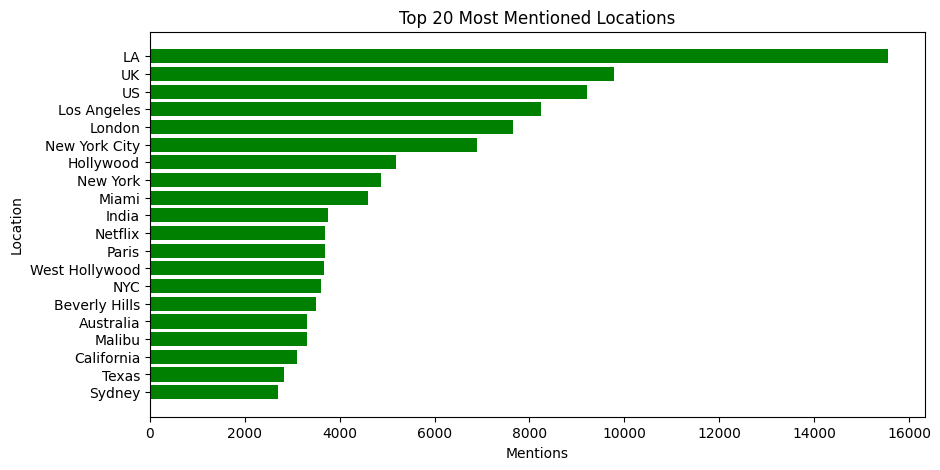

In [40]:
# Count most mentioned locations
location_counts = Counter(tweets_spacy_loc.tolist() + news_spacy_title_locations.tolist() + news_spacy_locations.tolist())

# Get top 20 locations
top_locations = location_counts.most_common(20)

# Convert to DataFrame
top_locations_df = pd.DataFrame(top_locations, columns=["Location", "Mentions"])

# Plot
plt.figure(figsize=(10, 5))
plt.barh(top_locations_df["Location"], top_locations_df["Mentions"], color='green')
plt.xlabel("Mentions")
plt.ylabel("Location")
plt.title("Top 20 Most Mentioned Locations")
plt.gca().invert_yaxis()
plt.show()

##### Table/Chart with Top-20 Companies (sorted in descending order)
Can use separate tables for titles and texts of news articles

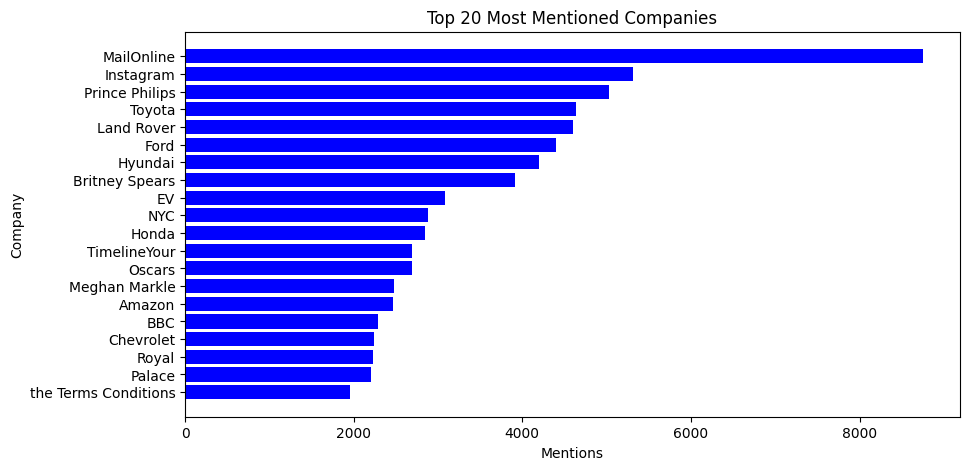

In [41]:
# Get top 20 most mentioned companies
top_companies = org_counts.most_common(20)

# Convert to DataFrame for visualization
top_companies_df = pd.DataFrame(top_companies, columns=["Company", "Mentions"])

# Plot
plt.figure(figsize=(10, 5))
plt.barh(top_companies_df["Company"], top_companies_df["Mentions"], color='blue')
plt.xlabel("Mentions")
plt.ylabel("Company")
plt.title("Top 20 Most Mentioned Companies")
plt.gca().invert_yaxis()  # Flip order
plt.show()

NLTK did not identify any objects. All of the entities were labeled as GPE's. 